Вариант: 5	
Алгоритм 1: SGD
Алгоритм 2: RMSProp
Число скрытых слоёв топология 1: 1
Число скрытых слоёв топология 2: 3	
Функция активации: Логистическая сигмоида
Функция ошибки: mean_squared_logarithmic_error

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [3]:
wine = datasets.load_wine(as_frame=True)
table = pd.DataFrame(wine.data,columns=wine.feature_names)
table['target']=wine.target
table

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
model1 = tf.keras.Sequential()
model1.add(layers.Dense(20,input_dim=13,activation='sigmoid'))
model1.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy'])
model2 = tf.keras.Sequential()
model2.add(layers.Dense(10,input_dim=13,activation='sigmoid'))
model2.add(layers.Dense(15,activation='sigmoid'))
model2.add(layers.Dense(3))
model2.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop', metrics=['accuracy'])

In [5]:
class_feature_means = pd.DataFrame()
for c, rows in table.groupby('target'):
    class_feature_means[c] = rows.mean()
class_feature_means

,0,1,2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [12]:
x = wine.data
y = np.ravel(wine.target)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
model1.fit(x_train,y_train,epochs=10)
accuracy_value,mse_value=model1.evaluate(x_test,y_test)
print(accuracy_value)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.0066
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.0066
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.0066
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.0066
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.0066
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.0066
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.0066
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.2290 - accuracy: 0.0066
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.0066
Epoch 10/10
1/1 [==============================] - 0s 22ms/step - loss: 0.2064 - accuracy: 0.0370
0.2064332664012909


In [14]:
epnum=range(0,13,1)
train_accuracy=np.empty(len(epnum))
test_accuracy=np.empty(len(epnum))
for i in range(1,len(epnum)):
    model1.fit(x_train,y_train, epochs=epnum[i])
    accruracy_value,mse_value=model1.evaluate(x_train,y_train)
    train_accuracy[i]=accuracy_value
    model1.fit(x_test,y_test)
    accruracy_value,mse_value=model1.evaluate(x_test,y_test)
    test_accuracy[i]=accuracy_value
accuracy_value

1/1 [==============================] - 0s 22ms/step - loss: 0.1952 - accuracy: 0.0370
Epoch 1/2
5/5 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.0066
Epoch 2/2
1/1 [==============================] - 0s 25ms/step - loss: 0.1949 - accuracy: 0.0370
Epoch 1/3
5/5 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.0066
Epoch 2/3
5/5 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.0066
Epoch 3/3
1/1 [==============================] - 0s 24ms/step - loss: 0.1945 - accuracy: 0.0370
Epoch 1/4
5/5 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.0066
Epoch 2/4
5/5 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.0066
Epoch 3/4
5/5 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.0066
Epoch 4/4
1/1 [==============================] - 0s 25ms/step - loss: 0.1939 - accuracy: 0.0370
Epoch 1/5
5/5 [==============================] - 0s 3ms/

5/5 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.0066
Epoch 6/11
5/5 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.0066
Epoch 7/11
5/5 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.0066
Epoch 8/11
5/5 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.0066
Epoch 9/11
5/5 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.0066
Epoch 10/11
5/5 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.0066
Epoch 11/11
1/1 [==============================] - 0s 25ms/step - loss: 0.1866 - accuracy: 0.0370
Epoch 1/12
5/5 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.0066
Epoch 2/12
5/5 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.0066
Epoch 3/12
5/5 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.0066
Epoch 4/12
5/5 [==============================] 

0.2064332664012909

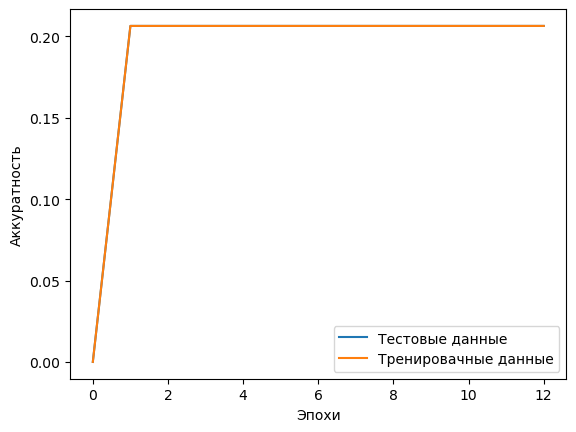

In [16]:
plt.plot(epnum,test_accuracy,label='Тестовые данные')
plt.plot(epnum,train_accuracy,label='Тренировачные данные')
plt.legend()
plt.xlabel('Эпохи')
plt.ylabel('Аккуратность')
plt.show()